# Stock Price Prediction of Starbucks #

#### _Programmed By: Reginald G. Lao_ #####

In [ ]:
# Imports
import numpy as np
import math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [ ]:
# Dataset
df = yf.download('SBUX', start = '2010-01-01', end = '2025-05-09')

print(df.head())
print(df.shape)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker          SBUX      SBUX      SBUX      SBUX      SBUX
Date                                                        
2010-01-04  8.787847  8.894597  8.734472  8.890785  16370000
2010-01-05  8.993725  9.150038  8.726848  8.753536  30058800
2010-01-06  8.928911  9.005162  8.867911  8.951786  14209600
2010-01-07  8.906039  8.970852  8.841226  8.875539  10256000
2010-01-08  8.875539  8.997539  8.841226  8.845039  10274800
(3861, 5)


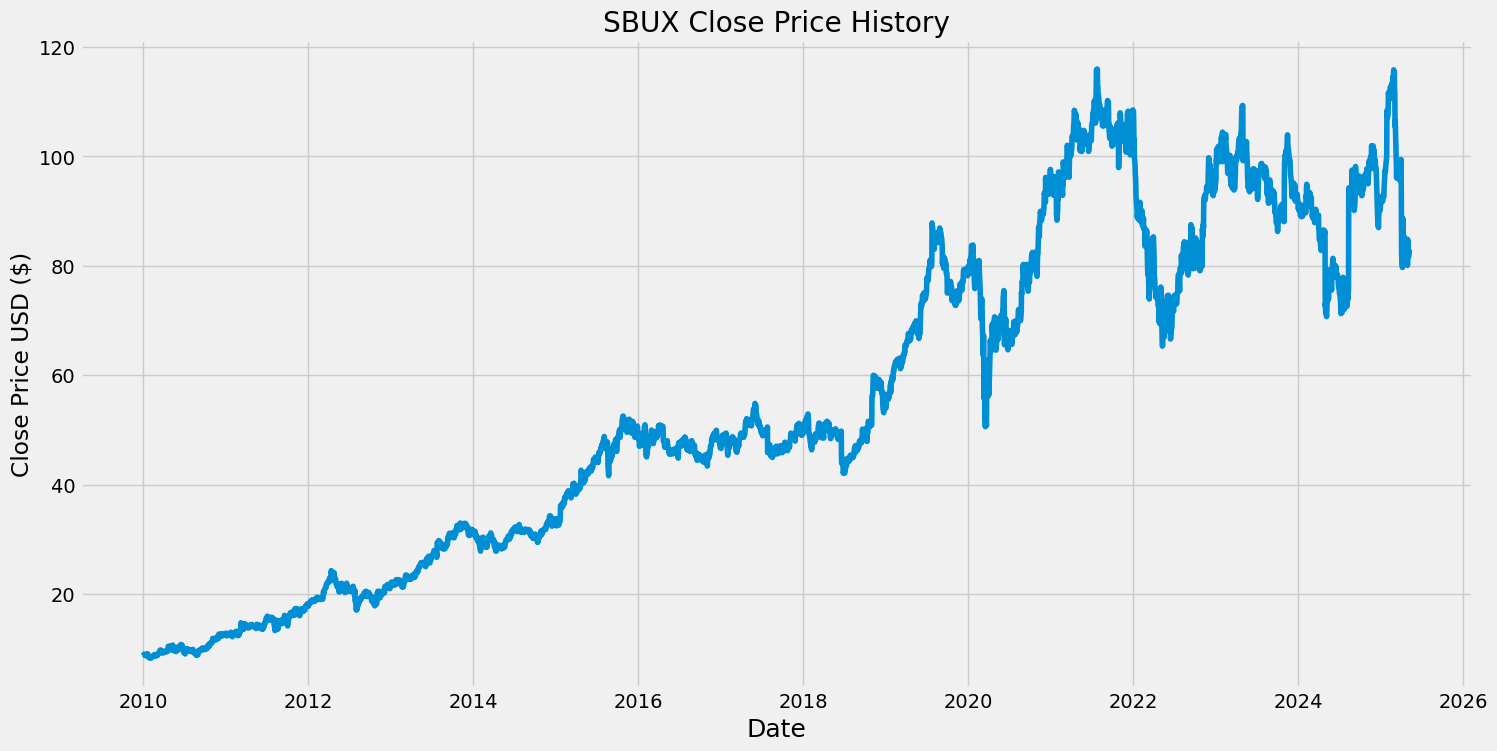

In [ ]:
# Plot
plt.figure(figsize = (16, 8))
plt.title('SBUX Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
# Convert data
data = df[['Close']]
dataset = data.values

data_len = math.ceil(len(dataset) * 0.8)
print("Training data size:", data_len)

Training data size: 3089


In [ ]:
# Scale data
scale = MinMaxScaler(feature_range = (0, 1))
scale_data = scale.fit_transform(data)

print(scale_data)

[[0.00477989]
 [0.00669187]
 [0.00608995]
 ...
 [0.69194186]
 [0.69129178]
 [0.68646259]]


In [ ]:
# Train data
train_data = scale_data[0:data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00477989, 0.00669187, 0.00608995, 0.00587754, 0.00559428,
       0.00534641, 0.00396558, 0.00594833, 0.00655024, 0.00555888,
       0.00665648, 0.00562968, 0.00701056, 0.0042842 , 0.00247847,
       0.0029742 , 0.0025139 , 0.00134548, 0.00031867, 0.00187658,
       0.00265551, 0.0025847 , 0.0003895 , 0.        , 0.00074356,
       0.00173496, 0.0023723 , 0.00304498, 0.00318663, 0.00417799,
       0.00513396, 0.00552345, 0.00587754, 0.00424884, 0.0034699 ,
       0.00488614, 0.00424884, 0.0042842 , 0.00562968, 0.0057713 ,
       0.00481533, 0.00431964, 0.00591292, 0.00573587, 0.0067981 ,
       0.00895791, 0.00909954, 0.00913495, 0.00963061, 0.012711  ,
       0.01366699, 0.01175504, 0.01157799, 0.01253398, 0.01313588,
       0.012711  , 0.00888709, 0.01023259, 0.01030336, 0.01012632])]
[0.009099540138062107]



In [ ]:
# Make x_train and y_train to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3029, 60, 1)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Train model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3029/3029 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - loss: 0.0053


In [ ]:
# Create testing data
test_data = scale_data[data_len - 60: , :]

x_test = []
y_test = dataset[data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Model predictions
pred = model.predict(x_test)
pred = scale.inverse_transform(pred)
pred = pred[:len(y_test)]

# Root Mean Squared Error
rmse = np.sqrt(np.mean(((pred - y_test) ** 2)))
rmse

# 0 means that prediction is accurate

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


3.1265566564471556

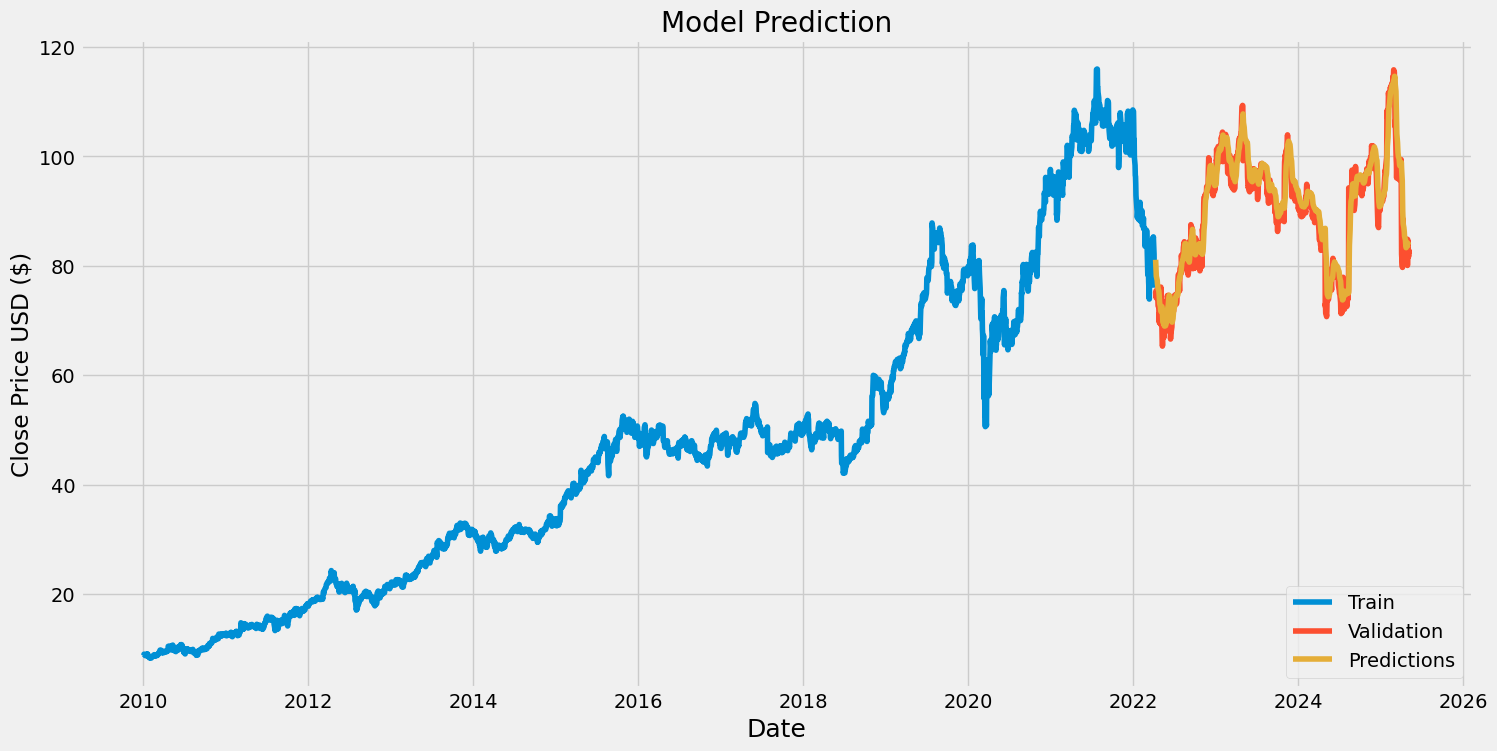

In [ ]:
# Plot data
train = data[:data_len]
validation = data[data_len:][:len(pred)].copy()
#validation = data[data_len:].copy()
validation['Predictions'] = pred[:len(validation)]

plt.figure(figsize = (16, 8))
plt.title('Model Prediction')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# Show validations
validation

Price,Close,Predictions
Ticker,SBUX,
Date,,
2022-04-11,75.198746,81.086525
2022-04-12,74.369225,79.986351
2022-04-13,75.422455,78.906662
2022-04-14,74.098923,78.091522
2022-04-18,74.192146,77.330185
...,...,...
2025-05-02,84.690002,83.744881
2025-05-05,81.660004,83.886673


In [ ]:
# Get quote
starbucks_quote = yf.download('SBUX', start = '2010-01-01', end = '2025-05-10')

starbucks_df = starbucks_quote['Close']

last_60_days = starbucks_df[-60:].values
last_60_days_scale = scale.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scale)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scale.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[83.322044]]


In [ ]:
starbucks_quote2 = yf.download('SBUX', start = '2025-05-09', end = '2025-05-10')
print(starbucks_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker           SBUX
Date                 
2025-05-09  80.300003


**_It is only off by $8.41_**